In [50]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as ts
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\ACER\Downloads\gas_turbines.csv")
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

# Data Insights and Visulaization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [6]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [48]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
CDP     float64
CO      float64
NOX     float64
TEy     float64
dtype: object

In [49]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
CDP      3611
CO      13096
NOX     11996
TEy         2
dtype: int64

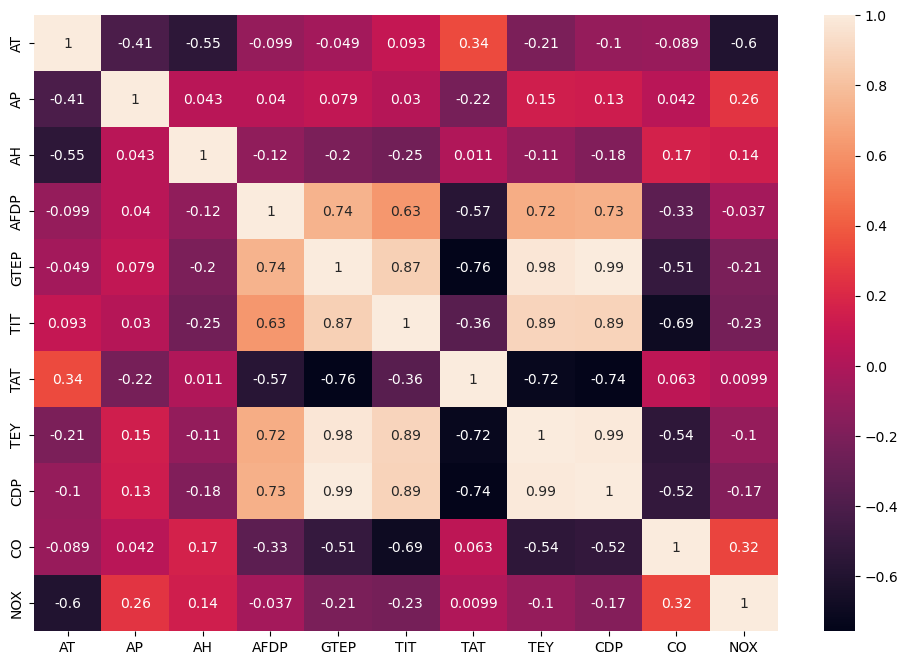

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

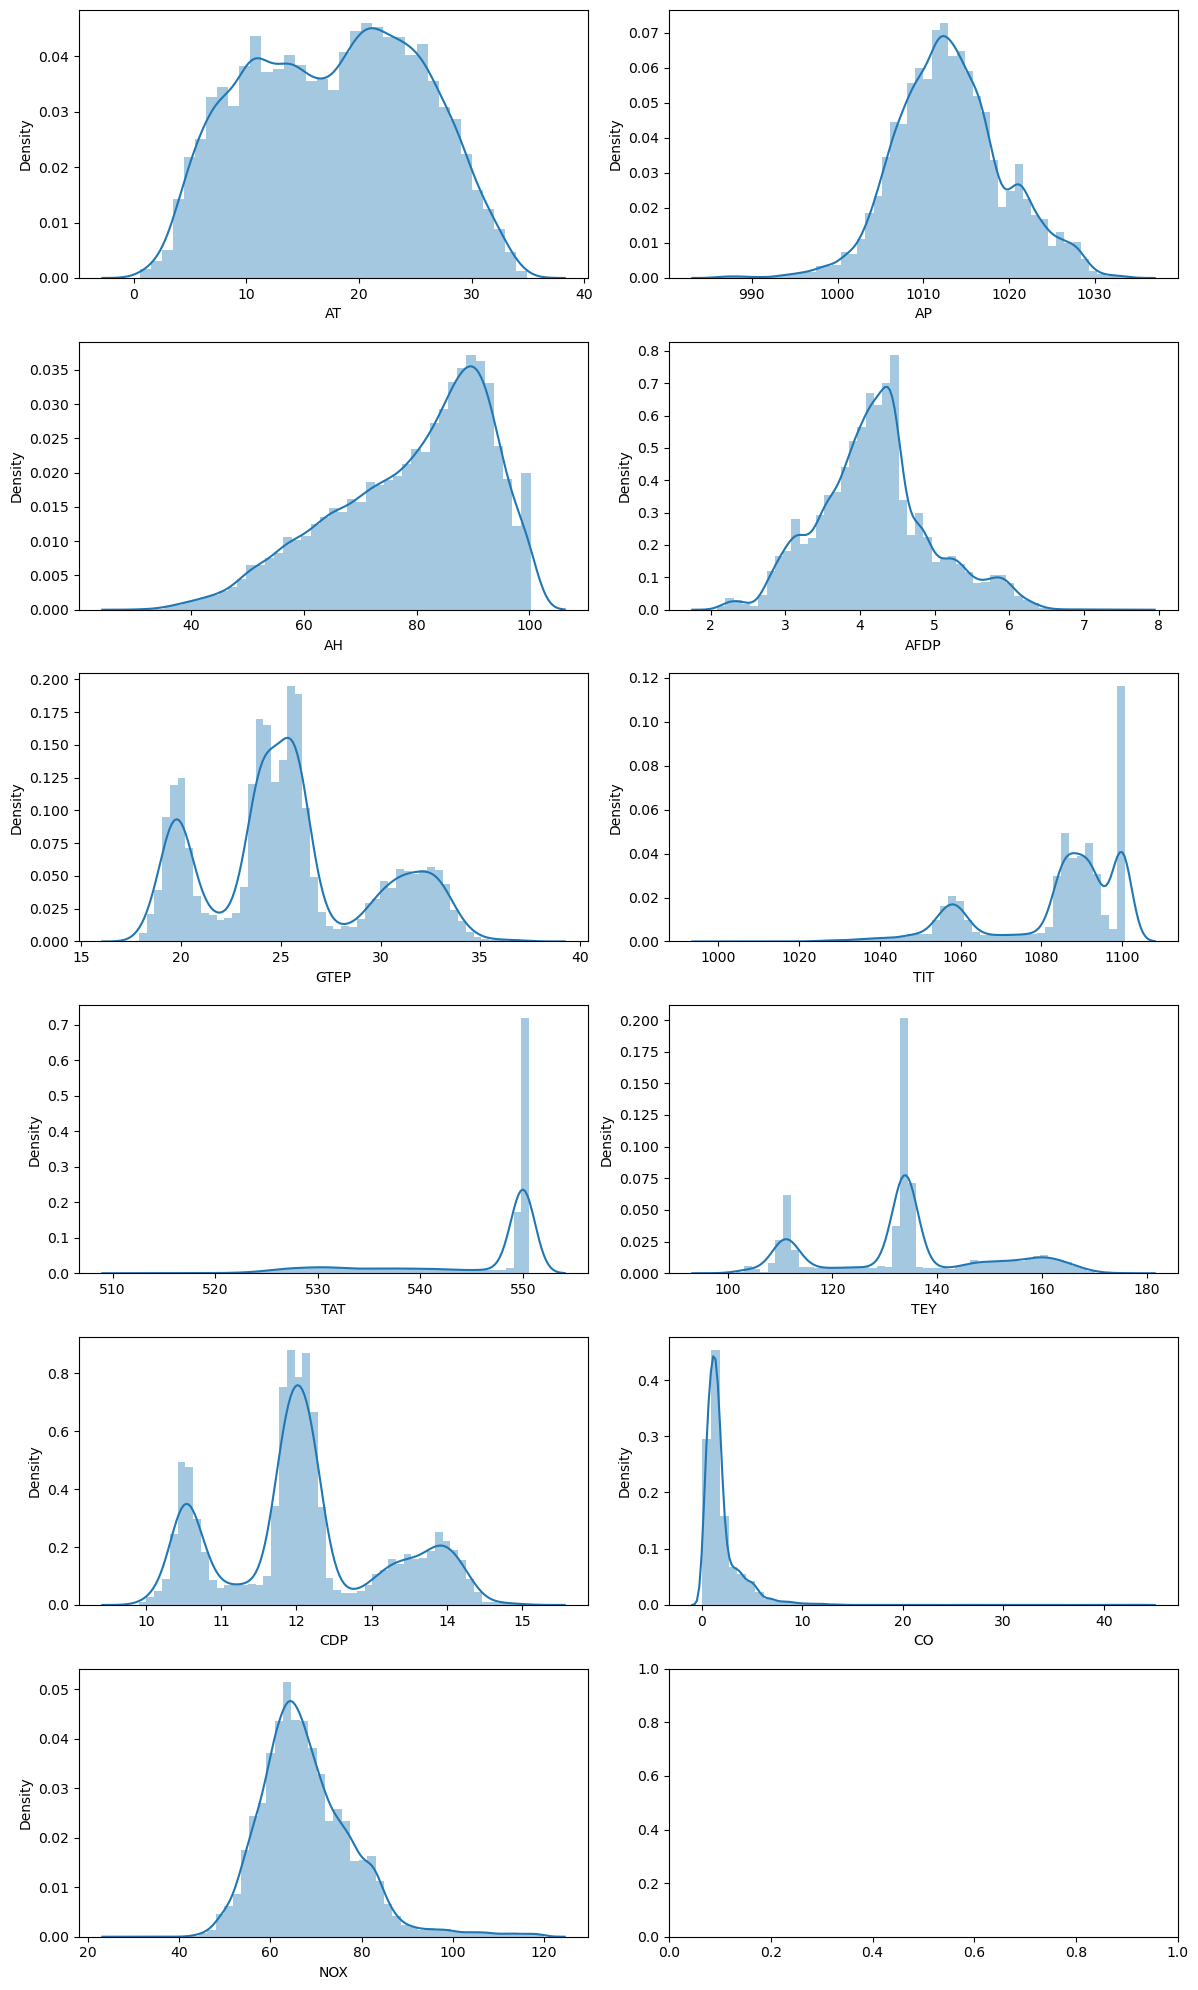

In [9]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.distplot(df.AT, ax = ax[0,0])
sns.distplot(df.AP, ax = ax[0,1])
sns.distplot(df.AH, ax = ax[1,0])
sns.distplot(df.AFDP, ax = ax[1,1])
sns.distplot(df.GTEP, ax = ax[2,0])
sns.distplot(df.TIT, ax = ax[2,1])
sns.distplot(df.TAT, ax = ax[3,0])
sns.distplot(df.TEY, ax = ax[3,1])
sns.distplot(df.CDP, ax = ax[4,0])
sns.distplot(df.CO, ax = ax[4,1])
sns.distplot(df.NOX, ax = ax[5,0])

plt.tight_layout()
plt.show()

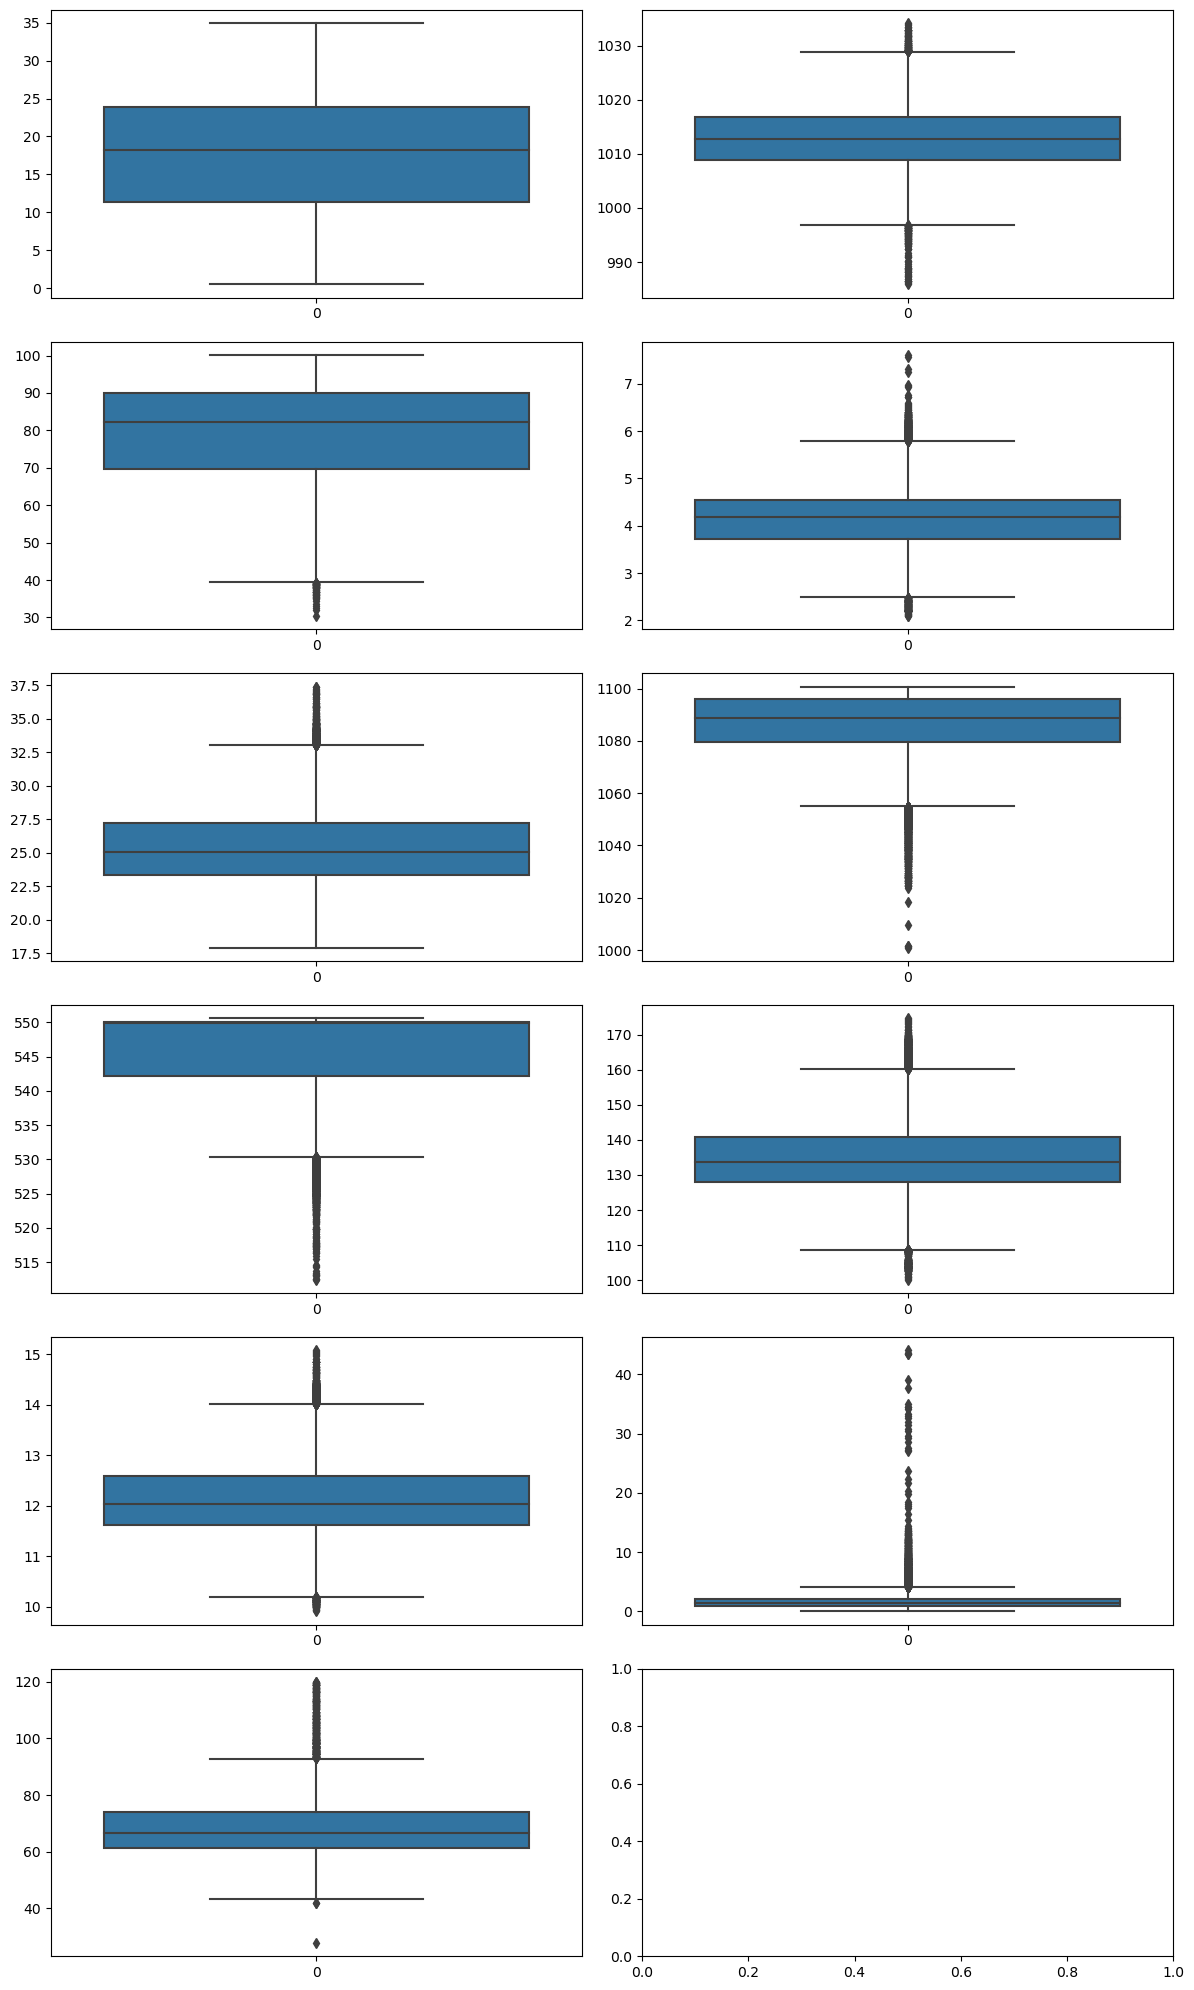

In [10]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.boxplot(df.AT, ax = ax[0,0])
sns.boxplot(df.AP, ax = ax[0,1])
sns.boxplot(df.AH, ax = ax[1,0])
sns.boxplot(df.AFDP, ax = ax[1,1])
sns.boxplot(df.GTEP, ax = ax[2,0])
sns.boxplot(df.TIT, ax = ax[2,1])
sns.boxplot(df.TAT, ax = ax[3,0])
sns.boxplot(df.TEY, ax = ax[3,1])
sns.boxplot(df.CDP, ax = ax[4,0])
sns.boxplot(df.CO, ax = ax[4,1])
sns.boxplot(df.NOX, ax = ax[5,0])

plt.tight_layout()
plt.show()

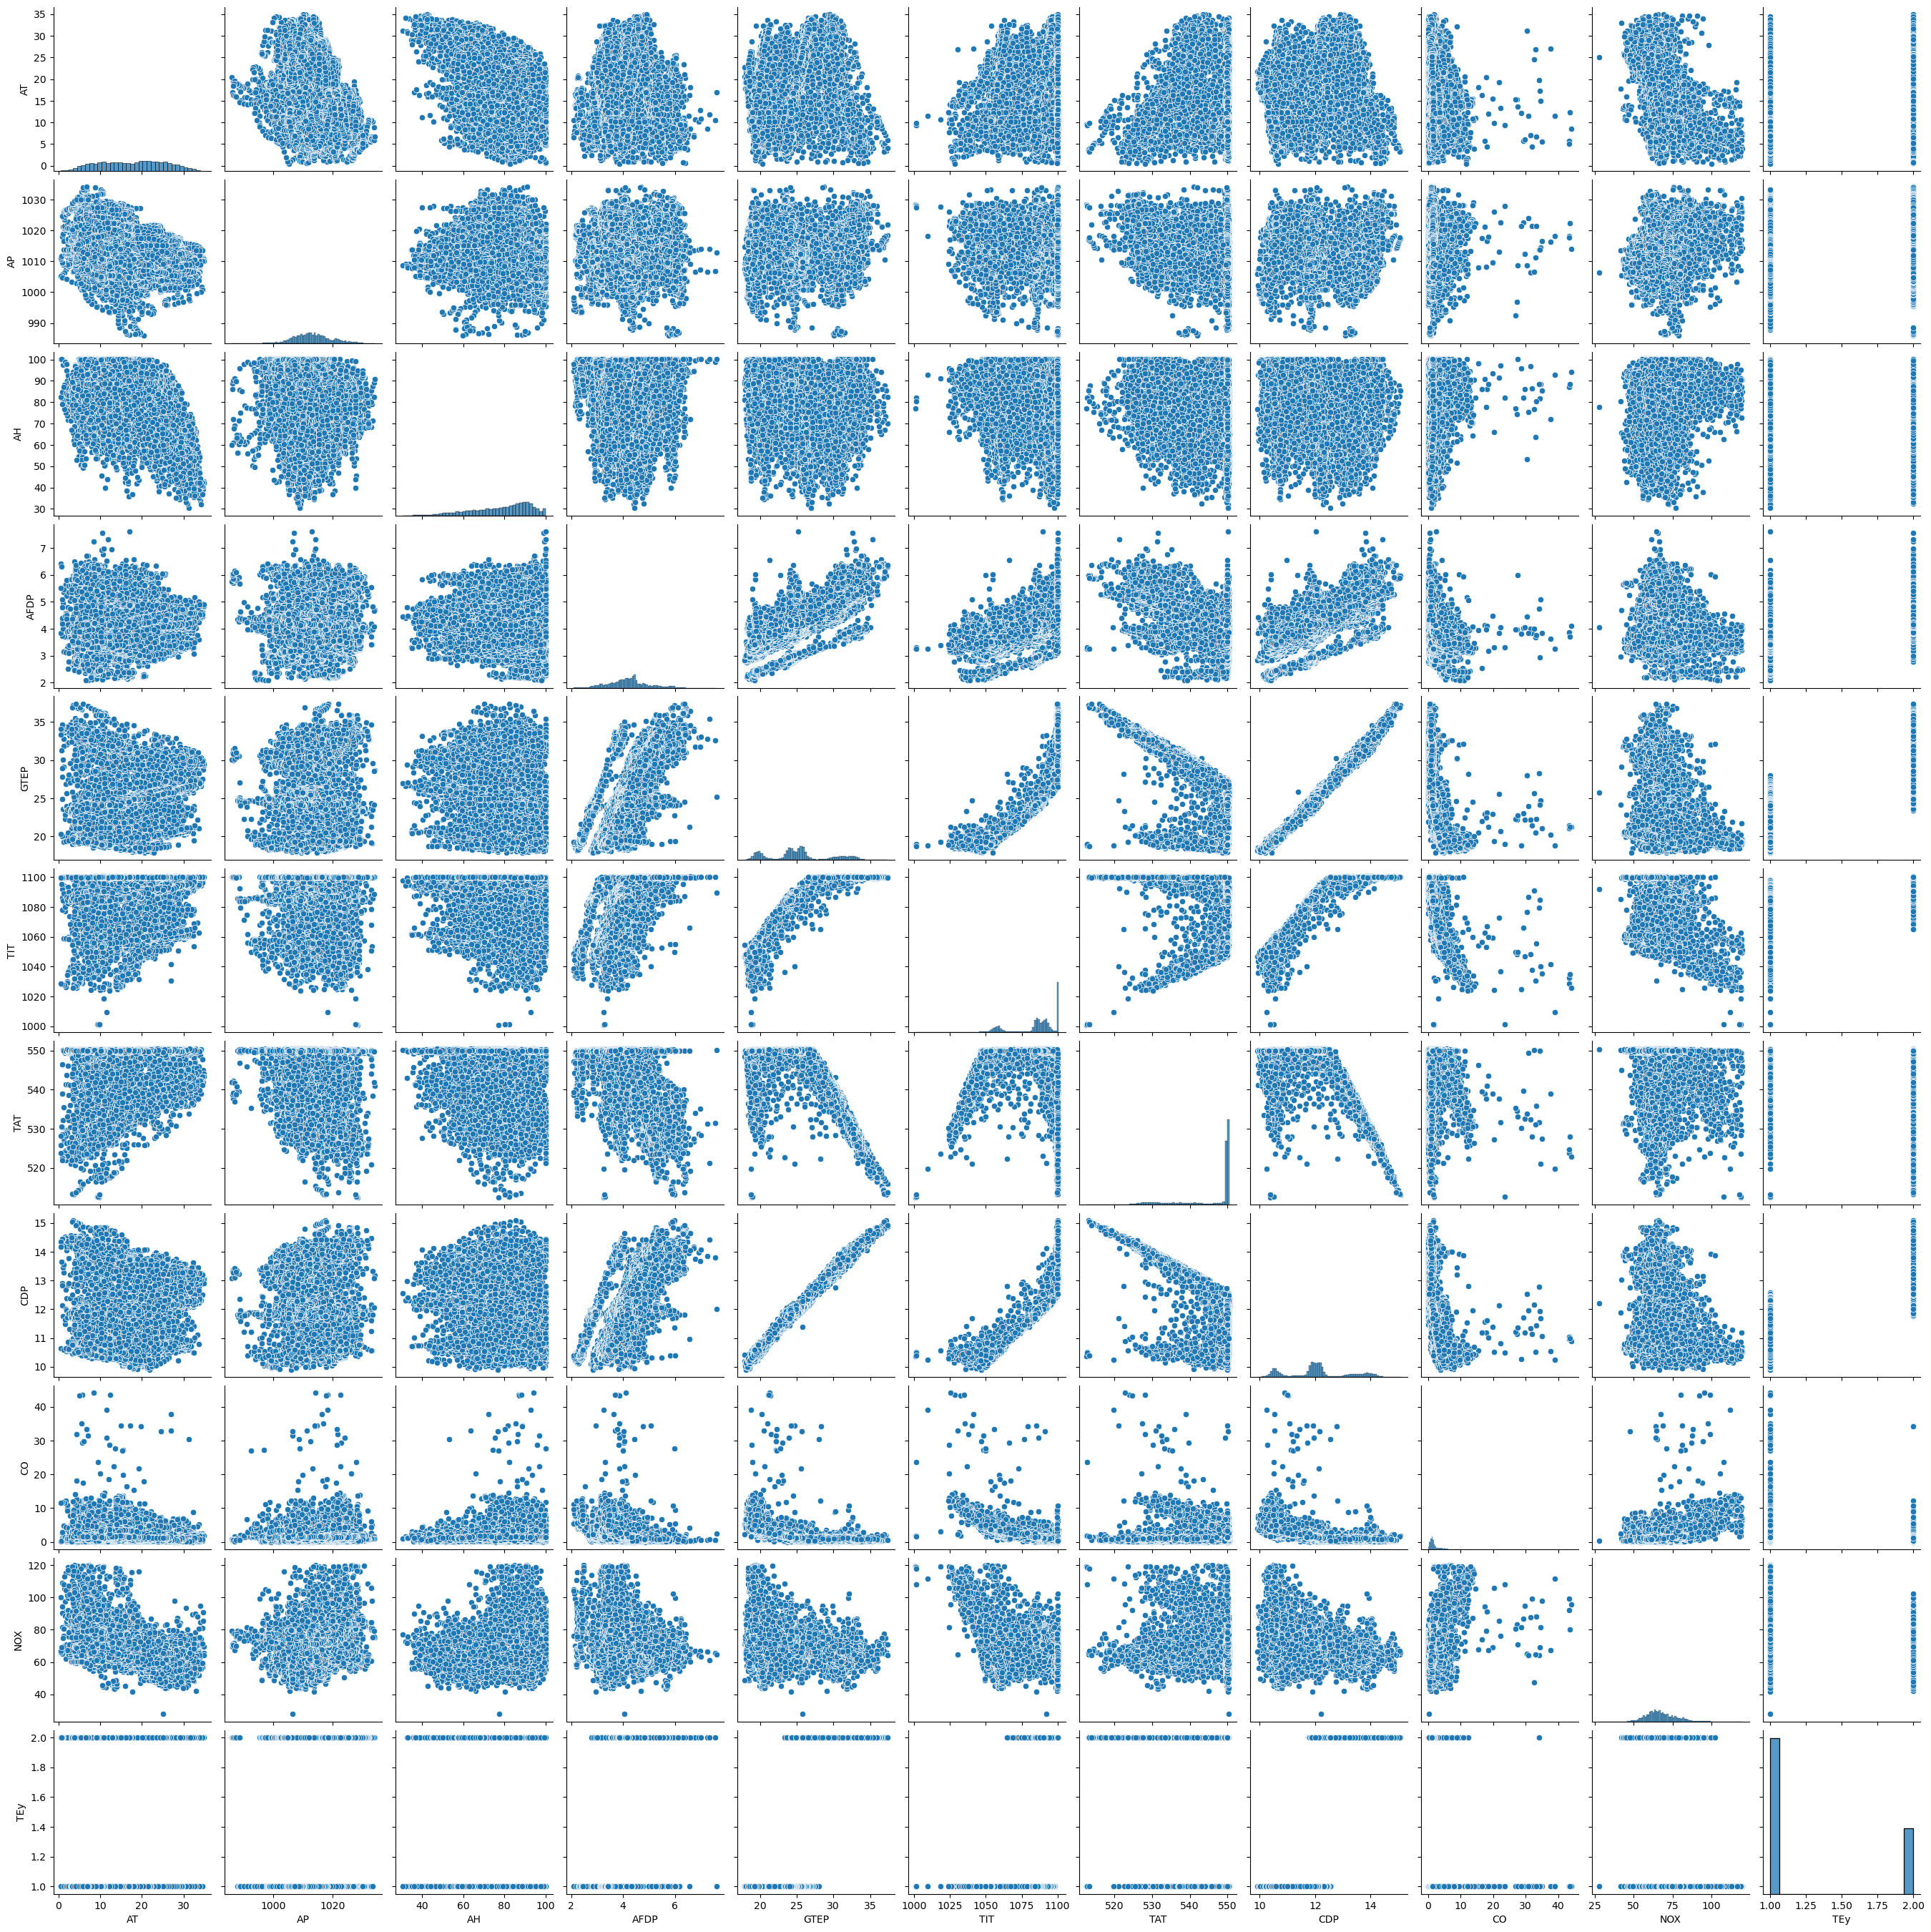

In [39]:
sns.pairplot(df)

In [11]:
df.loc[df["TEY"] <= 135,"TEy"] = 1
df.loc[df["TEY"] > 135,"TEy"] = 2
df.drop(["TEY"],axis = 1,inplace = True)

In [12]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  TEy  
0      82.722  1.0  
1      82.776  1.0  
2      82.468  1.0  
3      82.670  1.0  
4      82.311  1.0  
...       ...  ...  
15034  79.559  1.0  
15035  79.917  1.0  
15036  90.912  1.0  
15037  93.227  1.0  
15038  92.498  1.0  

[15039 rows x 11 columns]

In [13]:
y = df.TEy
x = df.drop(['TEy'], axis=1)

In [14]:
sc = StandardScaler()
x = sc.fit_transform(x)

# Training and Testing split

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

# Model Building

In [16]:
ann = Sequential()

In [17]:
ann.add(Dense(units=12,kernel_initializer = 'uniform',  activation='relu'))
ann.add(Dense(units=8, kernel_initializer = 'uniform',  activation='relu'))
ann.add(Dense(units=1, kernel_initializer = 'uniform', activation='linear'))

In [18]:
ann.compile(optimizer='adam',loss='mse', metrics = ['accuracy'])

In [19]:
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50, batch_size = 10)

Epoch 1/50
1204/1204 [==============================] - 6s 4ms/step - loss: 0.1895 - accuracy: 0.6331 - val_loss: 0.0487 - val_accuracy: 0.7048
Epoch 2/50
1204/1204 [==============================] - 4s 4ms/step - loss: 0.0451 - accuracy: 0.7028 - val_loss: 0.0461 - val_accuracy: 0.7048
Epoch 3/50
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0435 - accuracy: 0.7028 - val_loss: 0.0445 - val_accuracy: 0.7048
Epoch 4/50
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0424 - accuracy: 0.7028 - val_loss: 0.0441 - val_accuracy: 0.7048
Epoch 5/50
1204/1204 [==============================] - 4s 4ms/step - loss: 0.0415 - accuracy: 0.7028 - val_loss: 0.0436 - val_accuracy: 0.7048
Epoch 6/50
1204/1204 [==============================] - 5s 4ms/step - loss: 0.0408 - accuracy: 0.7028 - val_loss: 0.0423 - val_accuracy: 0.7048
Epoch 7/50
1204/1204 [==============================] - 5s 4ms/step - loss: 0.0399 - accuracy: 0.7028 - val_loss: 0.0421 - val_accuracy:

In [20]:
ypred = ann.predict(xtest)

94/94 [==============================] - 0s 2ms/step


In [21]:
ypred

array([[1.9426894 ],
       [1.972117  ],
       [0.98925006],
       ...,
       [1.959456  ],
       [1.25191   ],
       [1.9482917 ]], dtype=float32)

In [22]:
scores = ann.evaluate(xtrain, ytrain)
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

376/376 [==============================] - 1s 2ms/step - loss: 0.0211 - accuracy: 0.7028
accuracy: 70.28%


In [23]:
scores2 = ann.evaluate(xtest, ytest)
print("%s: %.2f%%" % (ann.metrics_names[1], scores2[1]*100))

94/94 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.7048
accuracy: 70.48%


In [24]:
history = ann.fit(xtrain,ytrain, validation_split = 0.3, epochs = 50, batch_size = 10)

Epoch 1/50
843/843 [==============================] - 4s 4ms/step - loss: 0.0211 - accuracy: 0.7060 - val_loss: 0.0206 - val_accuracy: 0.6953
Epoch 2/50
843/843 [==============================] - 3s 4ms/step - loss: 0.0207 - accuracy: 0.7060 - val_loss: 0.0203 - val_accuracy: 0.6953
Epoch 3/50
843/843 [==============================] - 4s 5ms/step - loss: 0.0206 - accuracy: 0.7060 - val_loss: 0.0201 - val_accuracy: 0.6953
Epoch 4/50
843/843 [==============================] - 3s 4ms/step - loss: 0.0203 - accuracy: 0.7060 - val_loss: 0.0198 - val_accuracy: 0.6950
Epoch 5/50
843/843 [==============================] - 4s 4ms/step - loss: 0.0202 - accuracy: 0.7060 - val_loss: 0.0197 - val_accuracy: 0.6953
Epoch 6/50
843/843 [==============================] - 3s 4ms/step - loss: 0.0199 - accuracy: 0.7060 - val_loss: 0.0215 - val_accuracy: 0.6953
Epoch 7/50
843/843 [==============================] - 3s 4ms/step - loss: 0.0201 - accuracy: 0.7060 - val_loss: 0.0201 - val_accuracy: 0.6953
Epoch 

In [25]:
ann.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

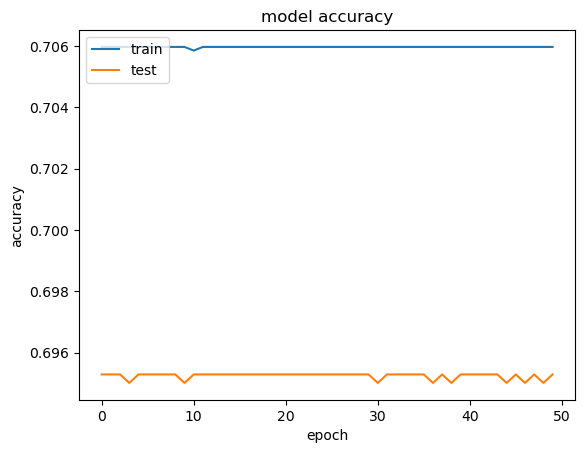

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

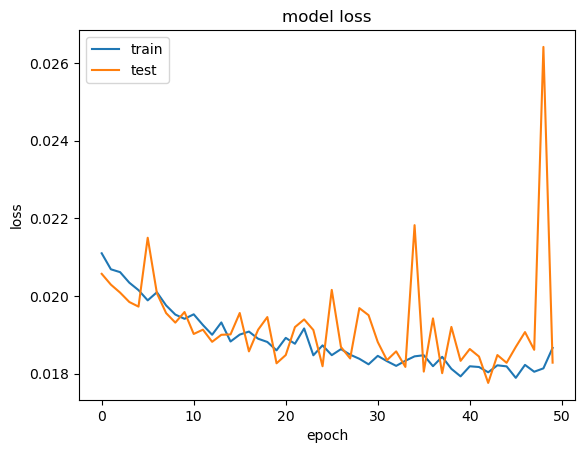

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Tuning of Hyperparameter : Batch Size and Epochs

In [29]:
from sklearn.model_selection import GridSearchCV, KFold
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [30]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'mse', optimizer = adam, metrics = ['accuracy'])
    return model

In [31]:
model_1 = KerasClassifier(build_fn = create_model,verbose = 0)

In [32]:
param_grid = dict(batch_size = [10,20,40],epochs = [10,50,100])

In [33]:
grid = GridSearchCV(estimator = model_1, param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.974 total time=  27.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.975 total time=  26.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.968 total time=  28.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.974 total time=  26.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.972 total time=  26.9s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.977 total time= 2.1min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.978 total time= 2.1min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.972 total time= 2.1min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.976 total time= 2.1min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.977 total time= 2.1min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.978 total time= 4.2min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.980 total time= 4.2min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.973 total time= 4.2min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.977 total time= 4.1min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.978 total time= 4.2min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.974 total time=  18.0s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.975 total time=  18.0s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.967 total time=  16.2s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.971 total time=  14.2s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.972 total time=  15.0s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=0.976 total time= 1.1min
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.979 total time= 1.1min
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


[CV 3/5; 5/9] END ....batch_size=20, epochs=50;, score=0.973 total time=677.9min
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.974 total time=  56.9s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.978 total time=  55.0s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=0.978 total time= 2.1min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.979 total time= 1.8min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.975 total time= 1.8min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.978 total time= 1.8min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.974 total time= 1.8min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.974 total time=   6.5s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.975 total time=   6.4s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.964 total time=   6.5s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.973 total time=   6.4s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.972 total time=   6.8s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.978 total time=  27.6s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.978 total time=  27.7s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.971 total time=  27.6s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.977 total time=  27.4s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.974 total time=  27.5s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.975 total time=  54.0s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.975 total time=  53.9s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.972 total time=  53.8s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.978 total time=  53.2s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.974 total time=  53.4s


In [34]:
grid.best_params_

{'batch_size': 10, 'epochs': 100}


# Revised Model

In [35]:
model_revised = ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100, batch_size = 10)

Epoch 1/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0182 - accuracy: 0.7027 - val_loss: 0.0200 - val_accuracy: 0.7048
Epoch 2/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0182 - accuracy: 0.7027 - val_loss: 0.0197 - val_accuracy: 0.7048
Epoch 3/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0181 - accuracy: 0.7028 - val_loss: 0.0201 - val_accuracy: 0.7048
Epoch 4/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0179 - accuracy: 0.7028 - val_loss: 0.0183 - val_accuracy: 0.7048
Epoch 5/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0179 - accuracy: 0.7027 - val_loss: 0.0179 - val_accuracy: 0.7048
Epoch 6/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0180 - accuracy: 0.7027 - val_loss: 0.0182 - val_accuracy: 0.7048
Epoch 7/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0177 - accuracy: 0.7027 - val_loss: 0.0188 - val_ac

1204/1204 [==============================] - 4s 3ms/step - loss: 0.0161 - accuracy: 0.7028 - val_loss: 0.0179 - val_accuracy: 0.7048
Epoch 58/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0161 - accuracy: 0.7028 - val_loss: 0.0178 - val_accuracy: 0.7048
Epoch 59/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0160 - accuracy: 0.7028 - val_loss: 0.0175 - val_accuracy: 0.7048
Epoch 60/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0159 - accuracy: 0.7028 - val_loss: 0.0191 - val_accuracy: 0.7048
Epoch 61/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0159 - accuracy: 0.7028 - val_loss: 0.0181 - val_accuracy: 0.7048
Epoch 62/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0161 - accuracy: 0.7028 - val_loss: 0.0175 - val_accuracy: 0.7048
Epoch 63/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.0162 - accuracy: 0.7028 - val_loss: 0.0186 - val_accuracy

In [36]:
ypred2 = ann.predict(xtest)

94/94 [==============================] - 0s 2ms/step


In [37]:
scores_revised = ann.evaluate(xtrain, ytrain)
print("%s: %.2f%%" % (ann.metrics_names[1], scores_revised[1]*100))

376/376 [==============================] - 1s 2ms/step - loss: 0.0156 - accuracy: 0.7028
accuracy: 70.28%


In [38]:
scores_revised2 = ann.evaluate(xtest, ytest)
print("%s: %.2f%%" % (ann.metrics_names[1], scores_revised2[1]*100))

94/94 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.7048
accuracy: 70.48%


#### Conclusion - 
Training Accuracy = 70.28% \
Testing Accuracy = 70.48%